# Домашнее задание №5

Борисов Дмитрий Сергеевич

Вариант: 
* Алгоритмы - Ward Linkage, DBSCAN; 
* Классы - "Overstrain Failure", "Power Failure","Tool Wear Failure"; 
* Число кластеров - 3



In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.preprocessing import LabelEncoder, StandardScaler
from sklearn.cluster import DBSCAN
import seaborn as sns

In [2]:
import warnings
warnings.filterwarnings("ignore", category=DeprecationWarning)
warnings.filterwarnings("ignore", category=FutureWarning)
warnings.filterwarnings("ignore", category=UserWarning)

## Загрузка датасета

In [3]:
df = pd.read_excel('predictive_maintenance.xlsx')
df

,UDI,Product ID,Type,Air temperature [K],Process temperature [K],Rotational speed [rpm],Torque [Nm],Tool wear [min],Target,Failure Type
0,1,M14860,M,298.1,308.6,1551,42.8,0,0,No Failure
1,2,L47181,L,298.2,308.7,1408,46.3,3,0,No Failure
2,3,L47182,L,298.1,308.5,1498,49.4,5,0,No Failure
3,4,L47183,L,298.2,308.6,1433,39.5,7,0,No Failure
4,5,L47184,L,298.2,308.7,1408,40.0,9,0,No Failure
...,...,...,...,...,...,...,...,...,...,...
9995,9996,M24855,M,298.8,308.4,1604,29.5,14,0,No Failure
9996,9997,H39410,H,298.9,308.4,1632,31.8,17,0,No Failure
9997,9998,M24857,M,299.0,308.6,1645,33.4,22,0,No Failure
9998,9999,H39412,H,299.0,308.7,1408,48.5,25,0,No Failure


In [4]:
df.describe()

,UDI,Air temperature [K],Process temperature [K],Rotational speed [rpm],Torque [Nm],Tool wear [min],Target
count,10000.00000,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000
mean,5000.50000,300.004930,310.005560,1538.776100,39.986910,107.951000,0.033900
std,2886.89568,2.000259,1.483734,179.284096,9.968934,63.654147,0.180981
min,1.00000,295.300000,305.700000,1168.000000,3.800000,0.000000,0.000000
25%,2500.75000,298.300000,308.800000,1423.000000,33.200000,53.000000,0.000000
50%,5000.50000,300.100000,310.100000,1503.000000,40.100000,108.000000,0.000000
75%,7500.25000,301.500000,311.100000,1612.000000,46.800000,162.000000,0.000000
max,10000.00000,304.500000,313.800000,2886.000000,76.600000,253.000000,1.000000


In [5]:
unique_values = df['Failure Type'].value_counts()
print(unique_values)

Failure Type
No Failure                  9652
Heat Dissipation Failure     112
Power Failure                 95
Overstrain Failure            78
Tool Wear Failure             45
Random Failures               18
Name: count, dtype: int64


## Подготовка датасета

Выборка из датасета по трём классам

In [6]:
classes = ["Overstrain Failure", "Power Failure", "Tool Wear Failure"]
df_3cls = df[df['Failure Type'].isin(classes)]
df_3cls

,UDI,Product ID,Type,Air temperature [K],Process temperature [K],Rotational speed [rpm],Torque [Nm],Tool wear [min],Target,Failure Type
50,51,L47230,L,298.9,309.1,2861,4.6,143,1,Power Failure
69,70,L47249,L,298.9,309.0,1410,65.7,191,1,Power Failure
77,78,L47257,L,298.8,308.9,1455,41.3,208,1,Tool Wear Failure
160,161,L47340,L,298.4,308.2,1282,60.7,216,1,Overstrain Failure
161,162,L47341,L,298.3,308.1,1412,52.3,218,1,Overstrain Failure
...,...,...,...,...,...,...,...,...,...,...
9758,9759,L56938,L,298.6,309.8,2271,16.2,218,1,Tool Wear Failure
9764,9765,L56944,L,298.5,309.5,1294,66.7,12,1,Power Failure
9822,9823,L57002,L,298.5,309.4,1360,60.9,187,1,Overstrain Failure
9830,9831,L57010,L,298.3,309.3,1337,56.1,206,1,Overstrain Failure


Разделение данных на признаки и классы

In [7]:
features = ['Type', 'Air temperature [K]', 'Process temperature [K]', 'Rotational speed [rpm]', 'Torque [Nm]', 'Tool wear [min]']
X = df_3cls[features]
X

,Type,Air temperature [K],Process temperature [K],Rotational speed [rpm],Torque [Nm],Tool wear [min]
50,L,298.9,309.1,2861,4.6,143
69,L,298.9,309.0,1410,65.7,191
77,L,298.8,308.9,1455,41.3,208
160,L,298.4,308.2,1282,60.7,216
161,L,298.3,308.1,1412,52.3,218
...,...,...,...,...,...,...
9758,L,298.6,309.8,2271,16.2,218
9764,L,298.5,309.5,1294,66.7,12
9822,L,298.5,309.4,1360,60.9,187
9830,L,298.3,309.3,1337,56.1,206


Преобразование категориальных значений в числовые

In [8]:
type_lab_enc = LabelEncoder()
X.loc[:, 'Type'] = type_lab_enc.fit_transform(X['Type'])
X

,Type,Air temperature [K],Process temperature [K],Rotational speed [rpm],Torque [Nm],Tool wear [min]
50,1,298.9,309.1,2861,4.6,143
69,1,298.9,309.0,1410,65.7,191
77,1,298.8,308.9,1455,41.3,208
160,1,298.4,308.2,1282,60.7,216
161,1,298.3,308.1,1412,52.3,218
...,...,...,...,...,...,...
9758,1,298.6,309.8,2271,16.2,218
9764,1,298.5,309.5,1294,66.7,12
9822,1,298.5,309.4,1360,60.9,187
9830,1,298.3,309.3,1337,56.1,206


In [9]:
y_lab_enc = LabelEncoder()
y = y_lab_enc.fit_transform(df_3cls['Failure Type'])
print(f"Unique failures before: {y_lab_enc.classes_}")
print(f"Unique failures after: {np.unique(y)}")

Unique failures before: ['Overstrain Failure' 'Power Failure' 'Tool Wear Failure']
Unique failures after: [0 1 2]


In [10]:
scaler = StandardScaler()
X = pd.DataFrame(scaler.fit_transform(X), columns=features)
X

,Type,Air temperature [K],Process temperature [K],Rotational speed [rpm],Torque [Nm],Tool wear [min]
0,-0.338766,-0.562846,-0.599820,2.807629,-2.265717,-0.296079
1,-0.338766,-0.562846,-0.664139,-0.366323,0.839811,0.393783
2,-0.338766,-0.611985,-0.728458,-0.267889,-0.400367,0.638110
3,-0.338766,-0.808542,-1.178692,-0.646314,0.585676,0.753087
4,-0.338766,-0.857681,-1.243011,-0.361948,0.158729,0.781831
...,...,...,...,...,...,...
213,-0.338766,-0.710263,-0.149586,1.517049,-1.676124,0.781831
214,-0.338766,-0.759403,-0.342543,-0.620064,0.890638,-2.178829
215,-0.338766,-0.759403,-0.406863,-0.475694,0.595841,0.336295
216,-0.338766,-0.857681,-0.471182,-0.526005,0.351872,0.609365


In [11]:
from sklearn.decomposition import PCA

new_x = PCA(n_components=2).fit_transform(X)
new_x.shape

(218, 2)

## Linkage-кластеризация
Для linkage-кластеризации гиперпараметрами являются:
* method ['complete', 'single', 'average', 'weighted', 'centroid', 'median', 'ward'] - описывает метод кластеризации;
* metric ['euclidean' (по умолчанию), 'cityblock', 'cosine', 'correlation', 'hamming', 'jaccard'...] - метрики расстояния.

Для выбранного по варианту метода 'Ward' доступна лишь 'euclidean' метрика, поэтому подбор гиперпараметров linkage-кластеризации не имеет смысла. Вместо этого было реализовано сравнение каждого метода между собой по метрике расстояния 'euclidean'.


In [12]:
def visualize_clasters(X, y_pred, y_true, title='Clasterization'):
    if X.shape[1] != 2:
        raise ValueError("X must have exactly 2 features for 2D visualization.")

    # Создание графиков
    fig, axes = plt.subplots(1, 2, figsize=(12, 6))

    # Слева: точки, окрашенные по y_pred
    axes[0].scatter(X[:, 0], X[:, 1], c=y_pred, alpha=0.7)
    axes[0].set_title("Predicted Classes")
    axes[0].set_xlabel("feature 1")
    axes[0].set_ylabel("feature 2")

    # Справа: точки, окрашенные по y_true
    axes[1].scatter(X[:, 0], X[:, 1], c=y_true, alpha=0.7)
    axes[1].set_title("True Classes")
    axes[1].set_xlabel("feature 1")
    axes[1].set_ylabel("feature 2")

    fig.suptitle(title, fontsize=16)
    plt.tight_layout()
    plt.show()


Iter: linkage method - complete


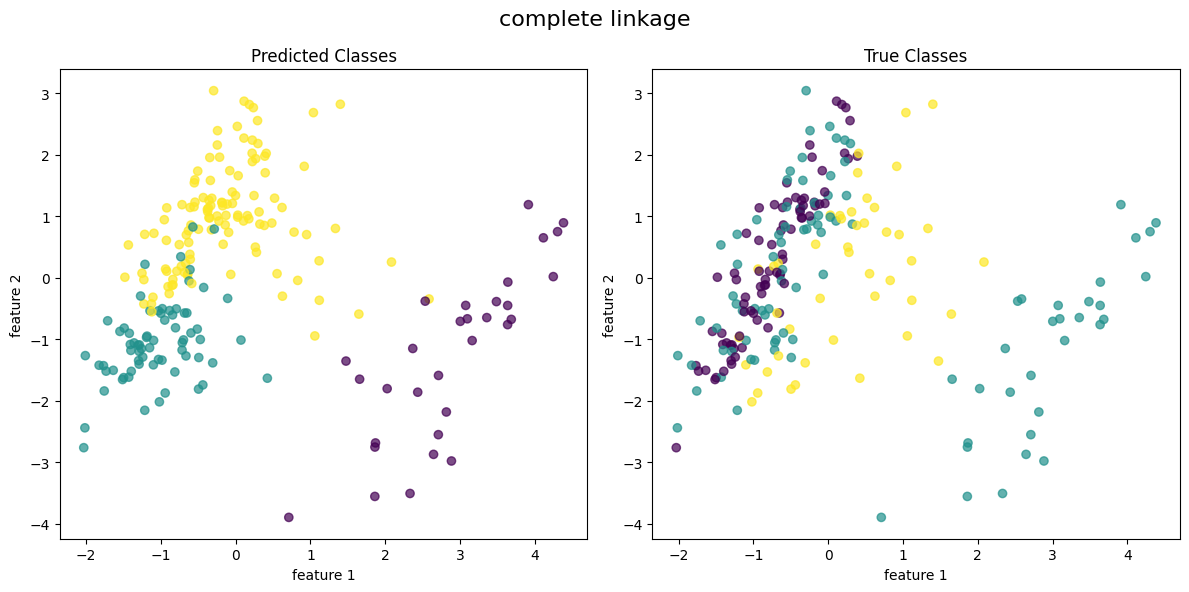

Iter: linkage method - single


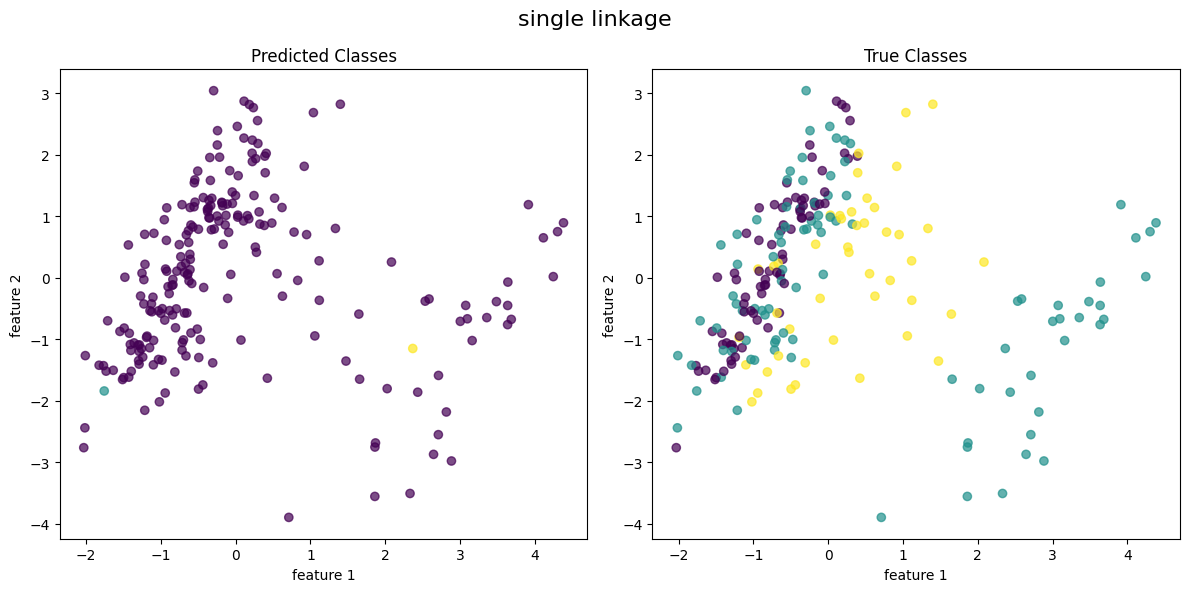

Iter: linkage method - average


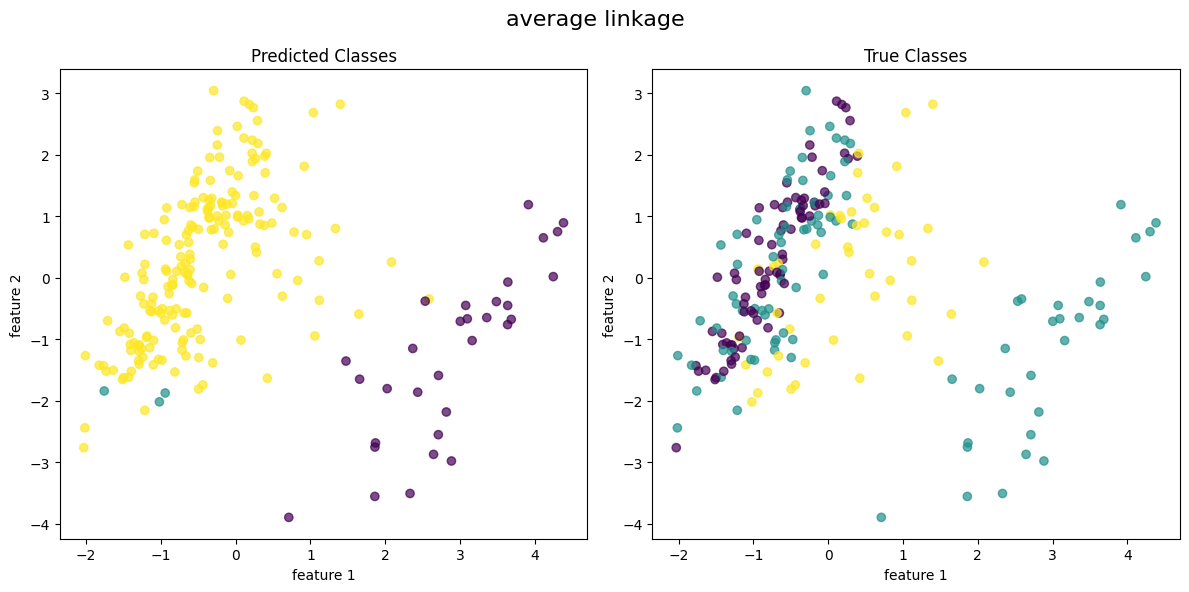

Iter: linkage method - weighted


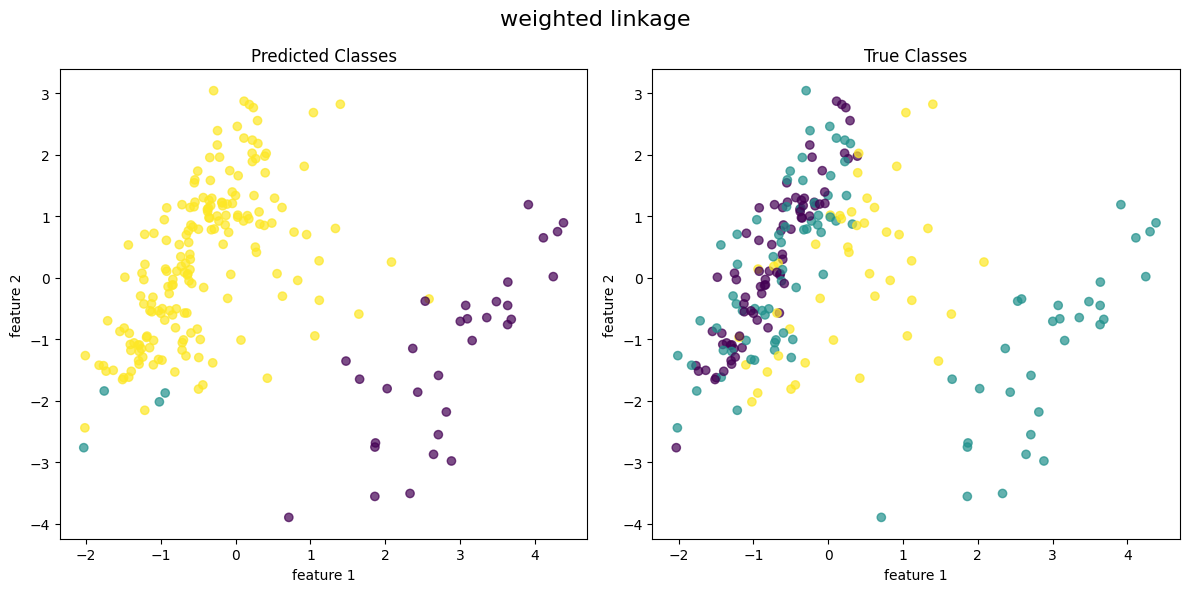

Iter: linkage method - centroid


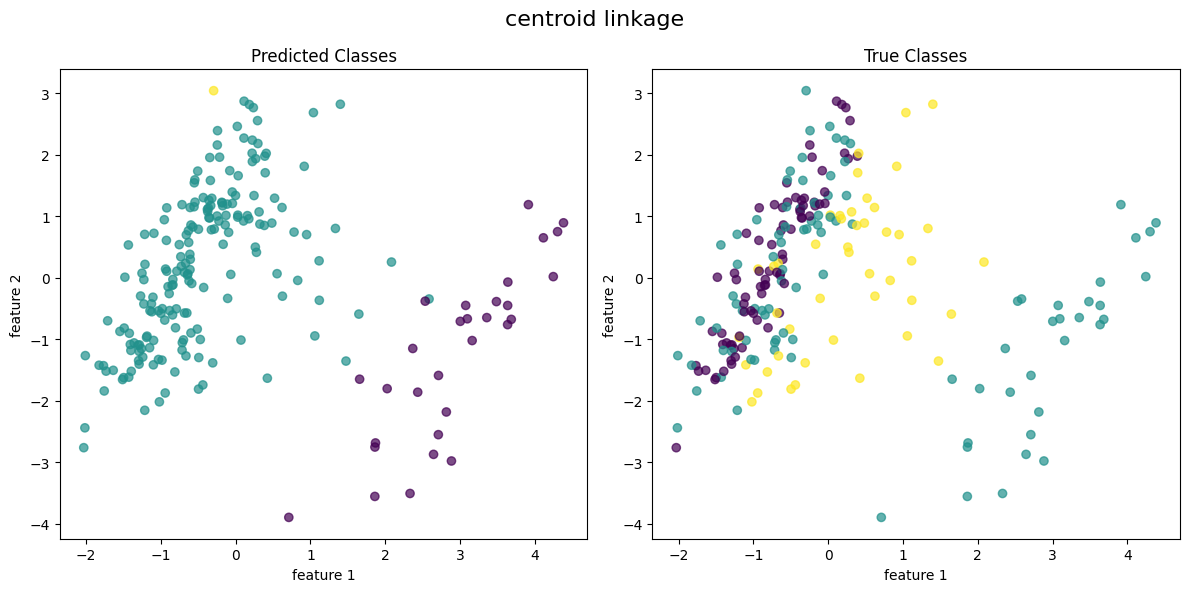

Iter: linkage method - median


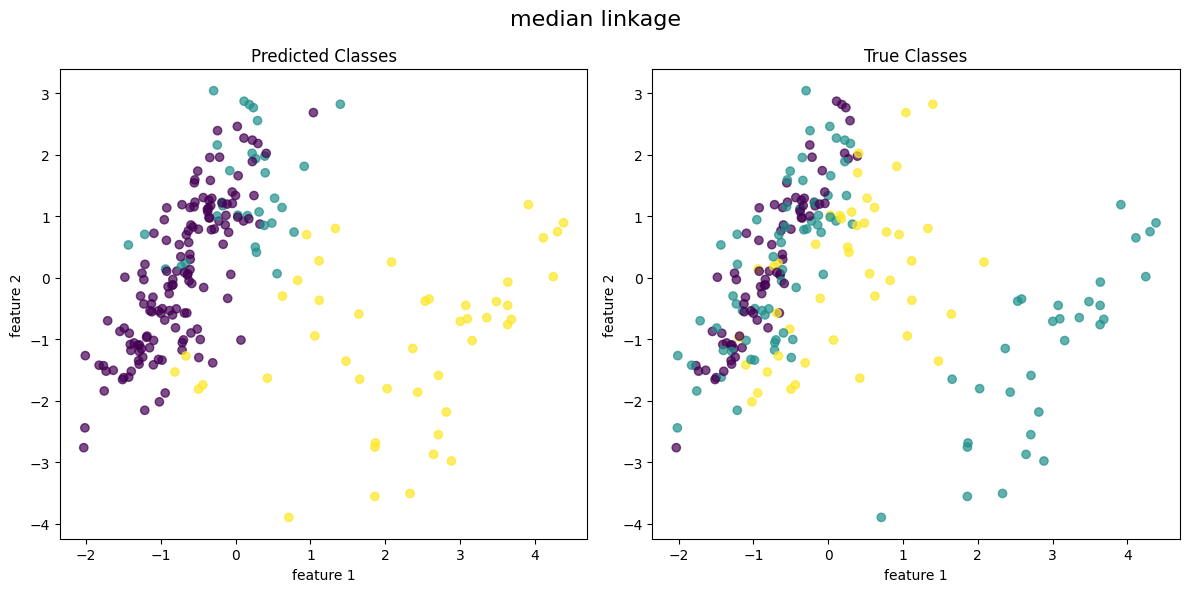

Iter: linkage method - ward


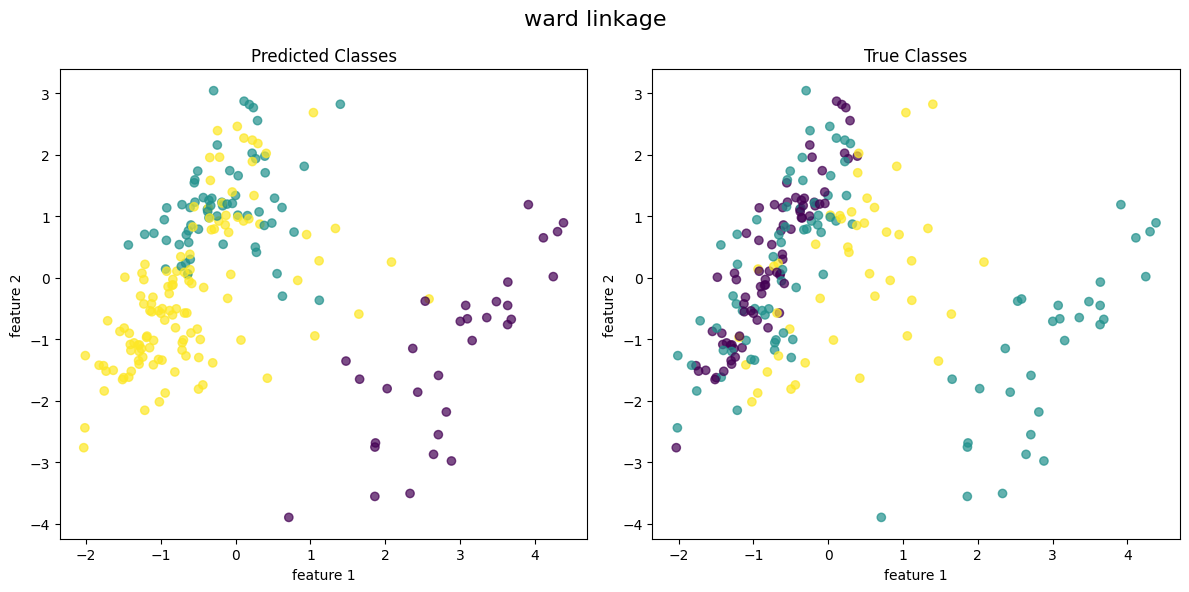

,complete,single,average,weighted,centroid,median,ward
completeness,0.131775,0.131134,0.260012,0.237725,0.311573,0.206218,0.16059


In [13]:
from scipy.cluster.hierarchy import dendrogram, linkage, fcluster
from sklearn.metrics import completeness_score


# Параметры для подбора
linkage_methods = ['complete', 'single', 'average', 'weighted', 'centroid', 'median', 'ward']
clusters = 3
linkage_results = {method: [] for method in linkage_methods}

for method in linkage_methods:
    # Генерация linkage матрицы
    Z = linkage(X, method=method)

    print(f'Iter: linkage method - {method}')

    y_pred = fcluster(Z, t=3, criterion='maxclust') - 1 # Уменьшаем имена кластеров [1, 2, 3] на единицу
    
    score = completeness_score(y, y_pred)
    linkage_results[method].append(score)

    visualize_clasters(new_x, y_pred, y, f'{method} linkage')
    
linkage_df = pd.DataFrame(linkage_results, index=['completeness'])
linkage_df

In [14]:
best_linkage = linkage_df.idxmax(axis=1).values[0]
best_score = linkage_df[best_linkage][0]
print("Лучший метод кластеризации linkage:", best_linkage, 'со значением completeness: ', best_score)

Лучший метод кластеризации linkage: centroid со значением completeness:  0.3115726835374764


## Кластеризация DBSCAN

In [15]:
from sklearn.model_selection import ParameterGrid

# Реализация простейшего grid search с проверкой по метрике completeness
# Параметр n_clusters определяет необходимое количество кластеров,
def grid_search(model, param_grid, X, y, n_clusters=3):

    best_score = -1
    best_params = None
    best_model = None

    for params in ParameterGrid(param_grid):
        # Применение простейшей кросс-валидации
        test_model = model(**params)
        
        predicted_labels = test_model.fit_predict(X)

        score = completeness_score(y, predicted_labels)

        # Добавлена проверка количества распознаных кластеров,
        # чтобы избежать внесения всех данных в один кластер
        clusters = len(set(predicted_labels)) - (1 if -1 in predicted_labels else 0)

        # Проверка на лучший результат при необходимом количестве кластеров
        if  clusters == n_clusters and score > best_score:
            best_score = score
            best_params = params
            best_model = test_model
            # Выходим из цикла, так как мы нашли наилучшую модель
            if best_score == 1:
                break
        

    return best_model, best_params, best_score

In [16]:
param_grid_dbscan = {
    'eps': [0.1, 0.5, 1.0, 2.0, 4.0],
    'min_samples': [3, 5, 8, 12],
    'algorithm': ['ball_tree', 'kd_tree', 'brute'],
    'leaf_size': [20, 30, 40, 50],
    'metric': ['l1', 'euclidean', 'chebyshev', 'l2', 'manhattan', 'cityblock']

}

best_dbscan_model, best_dbscan_params, best_dbscan_score = grid_search(DBSCAN, param_grid_dbscan, X, y)

In [17]:
print("Лучшие параметры кластеризатора DBSCAN:", best_dbscan_params, 'со значением completeness: ', best_dbscan_score)

Лучшие параметры кластеризатора DBSCAN: {'algorithm': 'ball_tree', 'eps': 0.5, 'leaf_size': 20, 'metric': 'chebyshev', 'min_samples': 5} со значением completeness:  0.33737734955544124


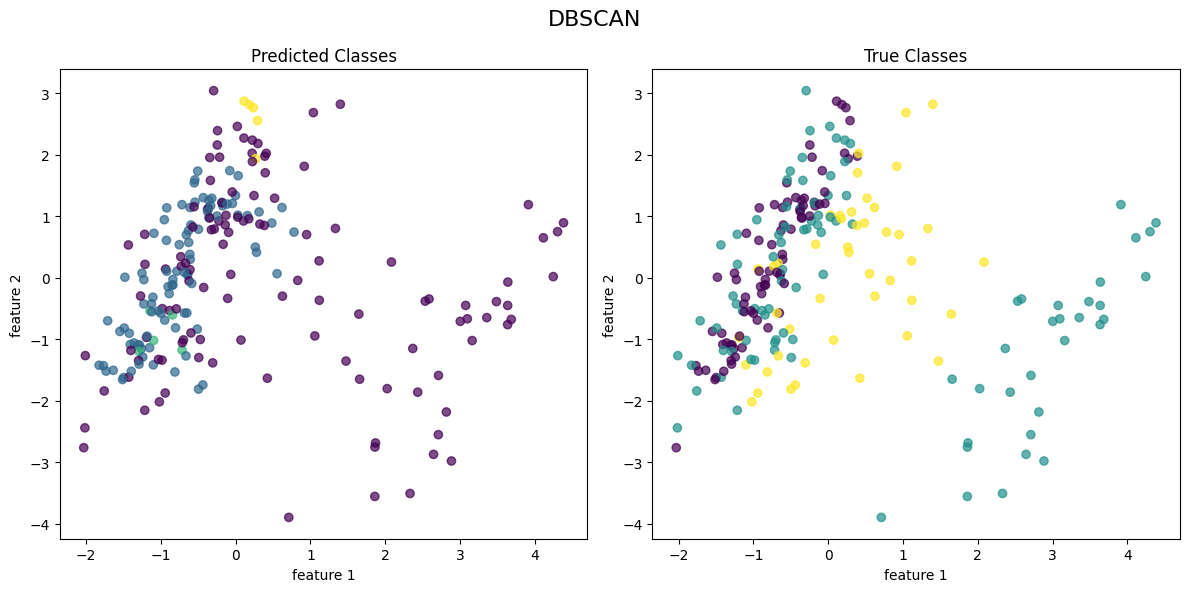

In [18]:
dbscan_pred = best_dbscan_model.fit_predict(X, y)
visualize_clasters(new_x, dbscan_pred, y, 'DBSCAN')

Сравнения результатов

In [19]:
# Показатели completeness кластеризатора linkage
linkage_df

,complete,single,average,weighted,centroid,median,ward
completeness,0.131775,0.131134,0.260012,0.237725,0.311573,0.206218,0.16059


In [20]:
# Показатели completeness кластеризатора linkage
print("Лучшие параметры кластеризатора DBSCAN:", best_dbscan_params, 'со значением completeness: ', best_dbscan_score)

Лучшие параметры кластеризатора DBSCAN: {'algorithm': 'ball_tree', 'eps': 0.5, 'leaf_size': 20, 'metric': 'chebyshev', 'min_samples': 5} со значением completeness:  0.33737734955544124


## Вывод
Проведённое сравнение показало, что при заданом датасете и необходимости разбить его на 3 кластера (во время кластеризации DBSCAN это строго проверялось) лучше всего с работой справился DBSCAN, хотя его значение completeness довольно близко к лучшей модели linkage.

При визуальном сравнении трудно сказать какой имено кластеризатор распределил кластеры лучшим образом. На истинном распределении кластеров видно, что пара классов расположена очень близко друг к другу, а один из них можно представить как два подкластера. 

При использовании всех признаков кластеризация оказалась невыгодной, однако, исходя из задания 4, при использовании только двух признаков или использования линейного дискриминантного анализа возможно кластеризация через linkage и DBSCAN покажет лучший результат.